In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [ ]:
file_path = '/content/drive/MyDrive/HackStars code /Grid_Data.csv'  # Update this to the path of your dataset
df = pd.read_csv(file_path)

In [ ]:
label_encoder = LabelEncoder()
df['stability'] = label_encoder.fit_transform(df['stability'])

In [ ]:
# Convert DateTime column to datetime type and extract useful features
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute

In [ ]:
X = df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Power_Training_Predicted_Values', 'power_gen_1', 'power_gen_2', 'power_gen_3', 'c1', 'c2', 'c3', 'p1', 'p2', 'p3']]  # Features
y = df['stability']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [ ]:
best_model = DecisionTreeRegressor(random_state=42, **best_params)
best_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                      random_state=42)

In [ ]:
predictions = best_model.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Square Error (RMSE): {rmse}')

Root Mean Square Error (RMSE): 0.46371904852225326


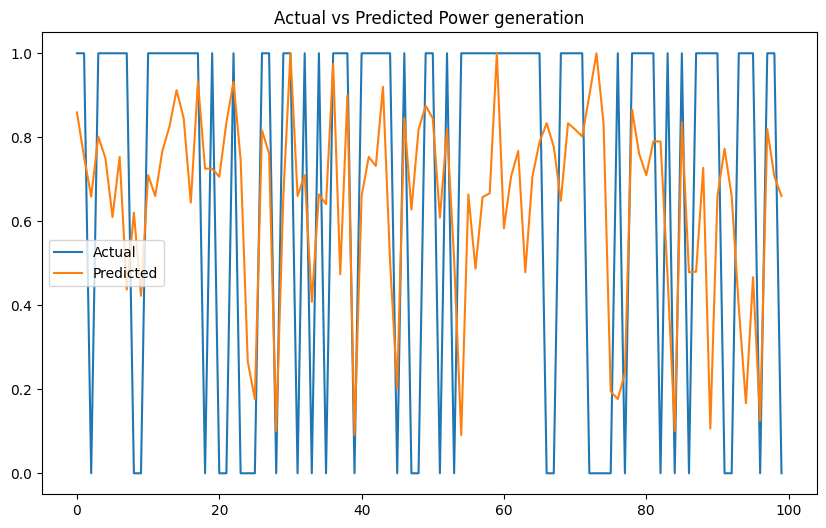

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(predictions[:100], label='Predicted')
plt.title('Actual vs Predicted Power generation')
plt.legend()
plt.show()

Best Hyperparameters: {'C': 100, 'penalty': 'l1'}
Accuracy: 0.7173987450085567
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.45      0.53      3133
           1       0.74      0.87      0.80      5632

    accuracy                           0.72      8765
   macro avg       0.70      0.66      0.67      8765
weighted avg       0.71      0.72      0.70      8765



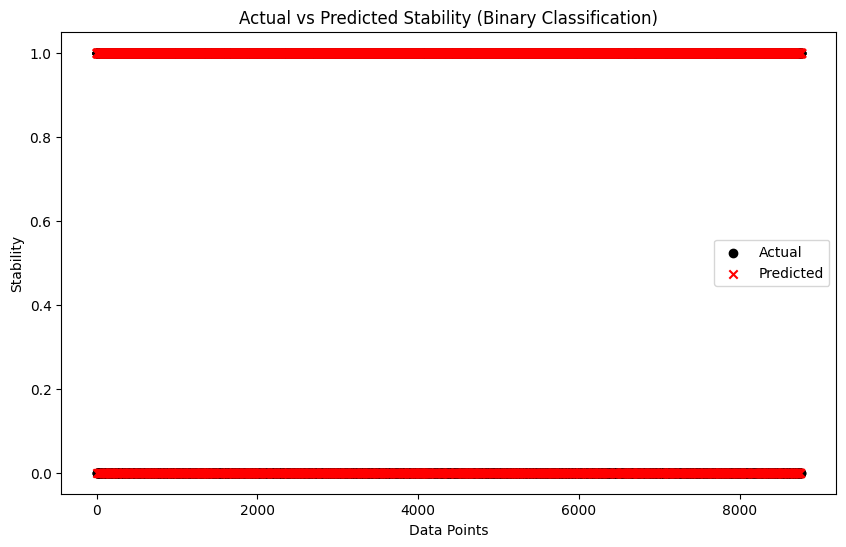

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

file_path = '/content/drive/MyDrive/HackStars code /Grid_Data.csv'  # Update this to the path of your dataset
df = pd.read_csv(file_path)

label_encoder = LabelEncoder()
df['stability'] = label_encoder.fit_transform(df['stability'])

# Convert DateTime column to datetime type and extract useful features
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute

X = df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Power_Training_Predicted_Values', 'power_gen_1', 'power_gen_2', 'power_gen_3', 'c1', 'c2', 'c3', 'p1', 'p2', 'p3']]  # Features
y = df['stability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization penalty ('l1' for Lasso, 'l2' for Ridge)
}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = LogisticRegression(solver='liblinear', random_state=42, **best_params)
best_model.fit(X_train, y_train)

predictions = best_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

print("Classification Report:")
print(classification_report(y_test, predictions))

# Visualization (for binary classification)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='black', label='Actual', marker='o')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted', marker='x')
plt.title('Actual vs Predicted Stability (Binary Classification)')
plt.xlabel('Data Points')
plt.ylabel('Stability')
plt.legend()
plt.show()


Best Hyperparameters: {'C': 100, 'penalty': 'l2'}
Accuracy: 0.7116704805491991
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.40      0.51       161
           1       0.72      0.89      0.80       276

    accuracy                           0.71       437
   macro avg       0.70      0.65      0.65       437
weighted avg       0.71      0.71      0.69       437



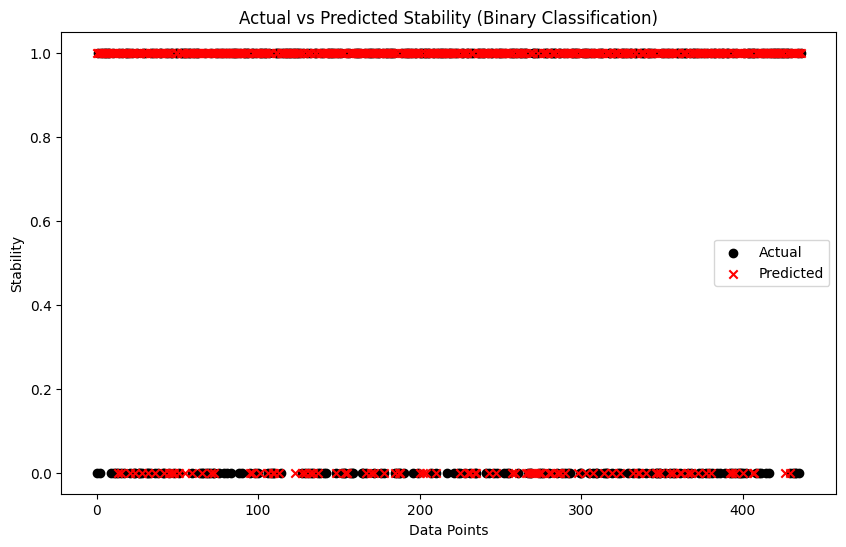

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

file_path = '/content/drive/MyDrive/HackStars code /grid_stability_3months_validation_data.csv'  # Update this to the path of your dataset
df = pd.read_csv(file_path)

label_encoder = LabelEncoder()
df['stability'] = label_encoder.fit_transform(df['stability'])

# Convert DateTime column to datetime type and extract useful features
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute

X = df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Power_Training_Predicted_values', 'power_gen_1', 'power_gen_2', 'power_gen_3', 'c1', 'c2', 'c3', 'p1', 'p2', 'p3']]  # Features
y = df['stability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization penalty ('l1' for Lasso, 'l2' for Ridge)
}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = LogisticRegression(solver='liblinear', random_state=42, **best_params)
best_model.fit(X_train, y_train)

predictions = best_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

print("Classification Report:")
print(classification_report(y_test, predictions))

# Visualization (for binary classification)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='black', label='Actual', marker='o')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted', marker='x')
plt.title('Actual vs Predicted Stability (Binary Classification)')
plt.xlabel('Data Points')
plt.ylabel('Stability')
plt.legend()
plt.show()


In [ ]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [ ]:
# Map predicted values to 'stable' and 'unstable'
predicted_labels = ['stable' if pred == 1 else 'unstable' for pred in predictions]

predicted_labels


['stable',
 'stable',
 'stable',
 'stable',
 'stable',
 'stable',
 'stable',
 'stable',
 'stable',
 'stable',
 'stable',
 'stable',
 'stable',
 'unstable',
 'stable',
 'unstable',
 'stable',
 'stable',
 'stable',
 'stable',
 'stable',
 'unstable',
 'stable',
 'stable',
 'unstable',
 'stable',
 'stable',
 'stable',
 'unstable',
 'stable',
 'stable',
 'stable',
 'unstable',
 'stable',
 'stable',
 'stable',
 'unstable',
 'stable',
 'stable',
 'stable',
 'stable',
 'stable',
 'unstable',
 'stable',
 'stable',
 'unstable',
 'stable',
 'unstable',
 'unstable',
 'stable',
 'stable',
 'unstable',
 'stable',
 'stable',
 'stable',
 'unstable',
 'stable',
 'stable',
 'stable',
 'unstable',
 'stable',
 'stable',
 'stable',
 'stable',
 'stable',
 'unstable',
 'stable',
 'stable',
 'stable',
 'stable',
 'stable',
 'unstable',
 'stable',
 'unstable',
 'stable',
 'stable',
 'stable',
 'stable',
 'stable',
 'stable',
 'stable',
 'stable',
 'stable',
 'stable',
 'stable',
 'stable',
 'stable',
 'stable'

In [ ]:
result_df = pd.DataFrame({'Year': X_test['Year'],'Month':X_test['Month'],'Day':X_test['Day'],'Hour':X_test['Hour'], 'Predicted_Stability': predicted_labels})

# Save the DataFrame to a CSV file
result_df.to_csv('predicted_stability.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


Accuracy: 0.7165893359701833

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.42      0.52      4739
           1       0.73      0.88      0.80      8408

    accuracy                           0.72     13147
   macro avg       0.70      0.65      0.66     13147
weighted avg       0.71      0.72      0.70     13147



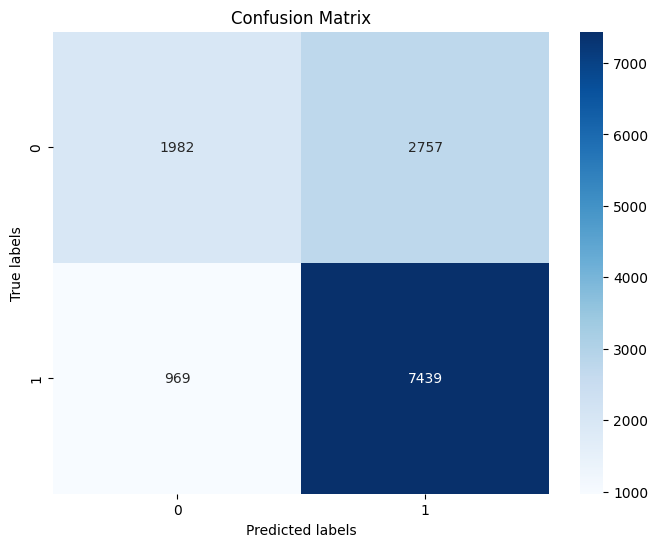

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/HackStars code /Grid_Data.csv')

label_encoder = LabelEncoder()
df['stability'] = label_encoder.fit_transform(df['stability'])

# Convert DateTime column to datetime type and extract useful features
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute

# Assuming 'grid_stability' is the column indicating stability (1 for stable, 0 for unstable)
# Modify this according to your actual dataset
X = df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Power_Training_Predicted_Values', 'power_gen_1', 'power_gen_2', 'power_gen_3', 'c1', 'c2', 'c3', 'p1', 'p2', 'p3']]  # Features
# Assuming 'grid_stability' is the column indicating stability (1 for stable, 0 for unstable)
y = df['stability']  # Target variable

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Initialize and train the Naive Bayes model (Gaussian Naive Bayes for continuous features)
model = GaussianNB()
model.fit(X_train_imputed, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


Accuracy: 0.6935975609756098

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.38      0.48       246
           1       0.70      0.88      0.78       410

    accuracy                           0.69       656
   macro avg       0.68      0.63      0.63       656
weighted avg       0.69      0.69      0.67       656



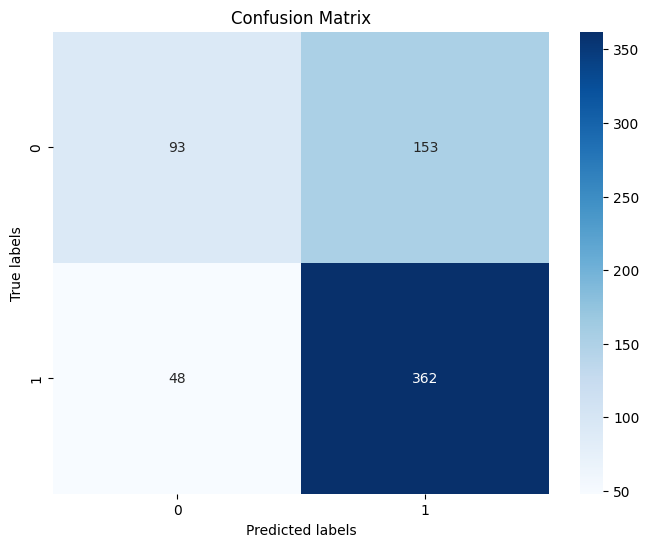

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/HackStars code /grid_stability_3months_validation_data.csv')

label_encoder = LabelEncoder()
df['stability'] = label_encoder.fit_transform(df['stability'])

# Convert DateTime column to datetime type and extract useful features
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute

# Assuming 'grid_stability' is the column indicating stability (1 for stable, 0 for unstable)
# Modify this according to your actual dataset
X = df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Power_Training_Predicted_values', 'power_gen_1', 'power_gen_2', 'power_gen_3', 'c1', 'c2', 'c3', 'p1', 'p2', 'p3']]  # Features
# Assuming 'grid_stability' is the column indicating stability (1 for stable, 0 for unstable)
y = df['stability']  # Target variable

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Initialize and train the Naive Bayes model (Gaussian Naive Bayes for continuous features)
model = GaussianNB()
model.fit(X_train_imputed, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()